<a href="https://colab.research.google.com/github/bloosterone/telecomx_latam_2/blob/main/TelecomX_LATAM(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **-------------- Challenge 1--------------**

##📌 Extracción (Challenge 1)

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##🔧 Transformación (Challenge 1)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [5]:
df_flat = df.copy()
customer_expanded = pd.json_normalize(df_flat['customer'])
phone_expanded = pd.json_normalize(df_flat['phone'])
internet_expanded = pd.json_normalize(df_flat['internet'])
account_expanded = pd.json_normalize(df_flat['account'])

In [6]:
df_transformed = pd.concat(
    [df_flat[['customerID', 'Churn']], customer_expanded, phone_expanded, internet_expanded, account_expanded],
    axis=1
)

In [7]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
df_transformed.isnull().sum().sort_values(ascending=False)


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [9]:
df_transformed.duplicated().sum()


np.int64(0)

In [10]:
df_transformed.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [11]:
df_transformed['Charges.Total'] = pd.to_numeric(df_transformed['Charges.Total'], errors='coerce')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
df_transformed['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
,224


In [13]:
df_transformed['Churn'] = df_transformed['Churn'].str.strip().str.lower()
df_transformed['Churn'].value_counts()




,count
Churn,
no,5174
yes,1869
,224


In [14]:
import numpy as np
df_transformed['Churn'] = df_transformed['Churn'].replace('', np.nan)

In [15]:
df_transformed['Churn'].isna().sum()


np.int64(224)

In [16]:
df_transformed['Churn'].value_counts()

,count
Churn,
no,5174
yes,1869


In [17]:
df_transformed = df_transformed.dropna(subset=['Churn'])

In [18]:
df_transformed['Churn'] = df_transformed['Churn'].str.strip().str.lower()
df_transformed['Churn'].value_counts()


,count
Churn,
no,5174
yes,1869


In [19]:
df_transformed['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [20]:
df_transformed['Contract'] = df_transformed['Contract'].str.lower().str.replace(' ', '-', regex=False)
df_transformed['Contract'].value_counts()



,count
Contract,
month-to-month,3875
two-year,1695
one-year,1473


In [21]:
df_transformed['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [22]:
df_transformed['PaymentMethod'] = df_transformed['PaymentMethod'].str.lower().str.replace(' ', '-', regex=False)
df_transformed['PaymentMethod'].value_counts()

,count
PaymentMethod,
electronic-check,2365
mailed-check,1612
bank-transfer-(automatic),1544
credit-card-(automatic),1522


In [23]:
df_transformed['Charges.Total'].value_counts()

,count
Charges.Total,
20.20,11
19.75,9
19.90,8
19.65,8
20.05,8
...,...
2058.50,1
829.55,1
625.65,1


In [24]:
df_transformed.columns = df_transformed.columns.str.lower()
df_transformed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

In [25]:
df_transformed['charges.monthly'].dtype



dtype('float64')

In [26]:
df_transformed['charges.monthly'].isnull().sum()

np.int64(0)

In [27]:
df_transformed['cuentas_diarias'] = df_transformed['charges.monthly'] / 30


In [28]:
df_transformed[['charges.monthly', 'cuentas_diarias']].head()


,charges.monthly,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [29]:
df_transformed['churn'].value_counts()

,count
churn,
no,5174
yes,1869


In [30]:
df_transformed['churn'] = df_transformed['churn'].str.strip().str.lower()
df_transformed['churn'] = df_transformed['churn'].map({'yes': 1, 'no': 0})
df_transformed['churn'].value_counts()

,count
churn,
0,5174
1,1869


##📊 Carga y análisis (Challenge 1)

In [31]:
df_transformed.describe()


,churn,seniorcitizen,tenure,charges.monthly,charges.total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.441561,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


In [32]:
df_transformed['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.73463
1,0.26537


In [33]:
df_transformed.groupby('churn')['charges.monthly'].mean()


,charges.monthly
churn,
0,61.265124
1,74.441332


In [34]:
df_transformed.groupby('churn')['tenure'].median()

,tenure
churn,
0,38.0
1,10.0


In [35]:
df_transformed.groupby('churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


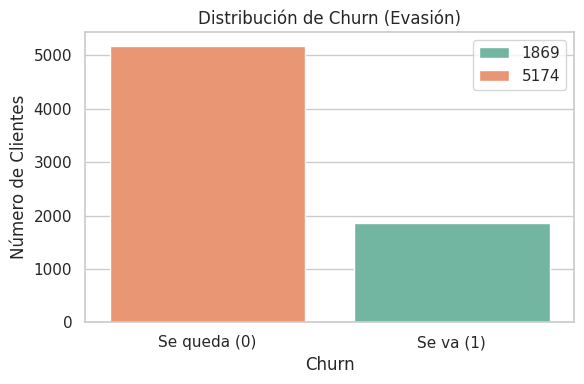

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


churn_counts = df_transformed['churn'].value_counts().sort_index()


plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values,hue=churn_counts.values, palette='Set2')


plt.xticks([0, 1], ['Se queda (0)', 'Se va (1)'])
plt.title('Distribución de Churn (Evasión)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()


### Evasion por genero

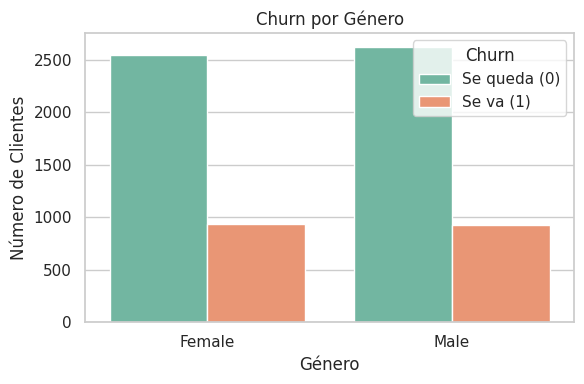

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_transformed, x='gender', hue='churn', palette='Set2')
plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Se queda (0)', 'Se va (1)'])
plt.tight_layout()
plt.show()


### Evasion por tipo de contrato

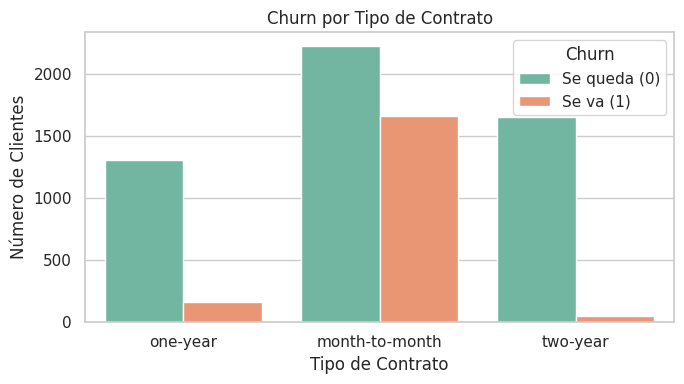

In [38]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df_transformed, x='contract', hue='churn', palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Se queda (0)', 'Se va (1)'])
plt.tight_layout()
plt.show()


### Evasion por metodo de pago

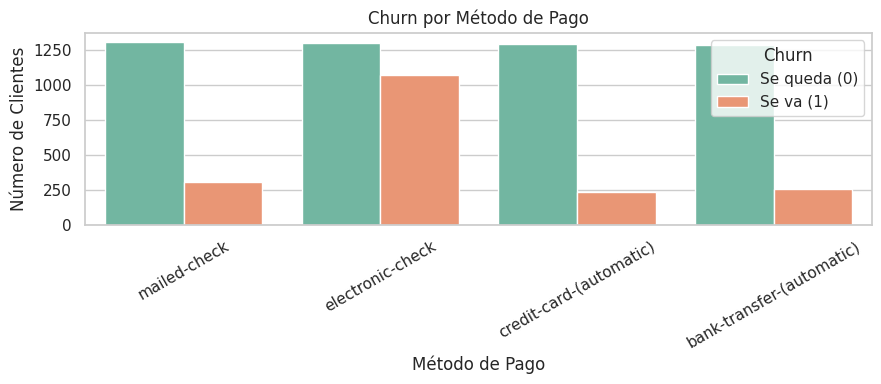

In [39]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df_transformed, x='paymentmethod', hue='churn', palette='Set2')
plt.title('Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=30)
plt.legend(title='Churn', labels=['Se queda (0)', 'Se va (1)'])
plt.tight_layout()
plt.savefig('/content/metodo_pago.png', transparent=False,dpi=300, bbox_inches='tight')
plt.show()


### Cuanto duran los clientes? (mediana con boxplot)


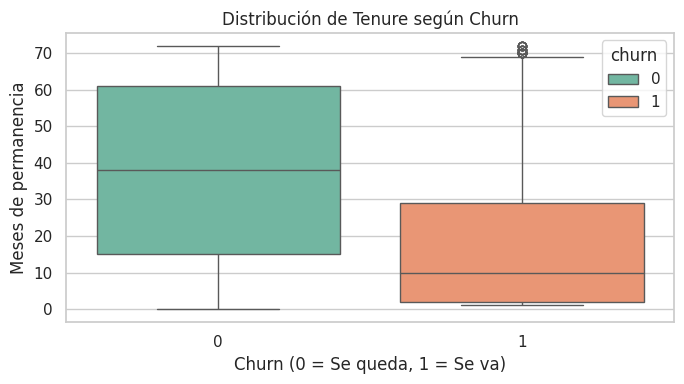

In [40]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_transformed, x='churn', hue='churn', y='tenure', palette='Set2')
plt.title('Distribución de Tenure según Churn')
plt.xlabel('Churn (0 = Se queda, 1 = Se va)')
plt.ylabel('Meses de permanencia')
plt.tight_layout()
plt.savefig('/content/tenure_churn.png', transparent=False,dpi=300, bbox_inches='tight')
plt.show()


### Distribución de Cargo Mensual según Churn

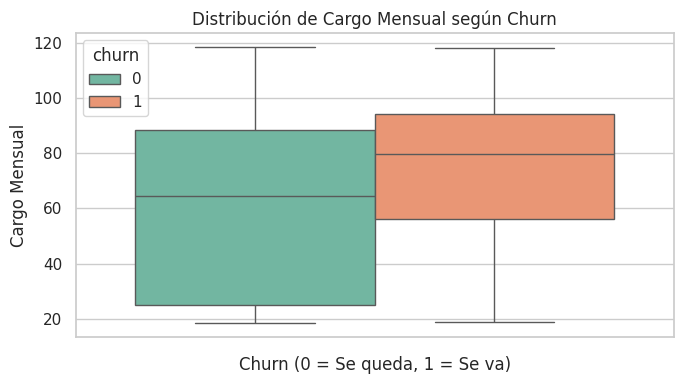

In [41]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_transformed, hue='churn', y='charges.monthly', palette='Set2')
plt.title('Distribución de Cargo Mensual según Churn')
plt.xlabel('Churn (0 = Se queda, 1 = Se va)')
plt.ylabel('Cargo Mensual')
plt.tight_layout()
plt.savefig('/content/cargo_mensual.png', transparent=False,dpi=300, bbox_inches='tight')
plt.show()


In [42]:
df_transformed.groupby('churn')[['tenure', 'charges.monthly', 'charges.total']].mean()


,tenure,charges.monthly,charges.total
churn,,,
0,37.569965,61.265124,2555.344141
1,17.979133,74.441332,1531.796094


##📄Informe final (Challenge 1)

###Introducción


El objetivo de este análisis fue entender el comportamiento de los clientes de la empresa de telecomunicaciones TelecomX_Latam, enfocándonos en la evasión de clientes (churn). Se buscaba descubrir patrones que ayuden a predecir por qué algunos clientes se van y qué características tienen en común, para así tomar decisiones que ayuden a reducir la tasa de cancelación.

### Limpieza y Tratamiento de Datos

Se comenzó importando los datos y revisando si existían valores nulos o inconsistentes. Algunos pasos importantes fueron:


*   Cambiar los nombres de las columnas a minúsculas y reemplazar espacios por
guiones para facilitar el análisis.
*   Convertir los valores de “Yes/No” en binarios (1/0), por ejemplo en la columna churn.
*   Crear una nueva columna llamada cuentas_diarias, calculando cuánto paga en promedio un cliente por día (a partir del cargo mensual).
*   Corregir el tipo de dato en total.charges, que venía como texto.


###Análisis Exploratorio de Datos

Se realizaron varios análisis y visualizaciones para entender mejor los datos:

    

*   La mayoría de los clientes que se fueron (churn = 1) habían estado menos tiempo con la empresa y tenían cargos mensuales más altos.
*       Clientes con planes de contrato a dos años tienden a quedarse más tiempo.


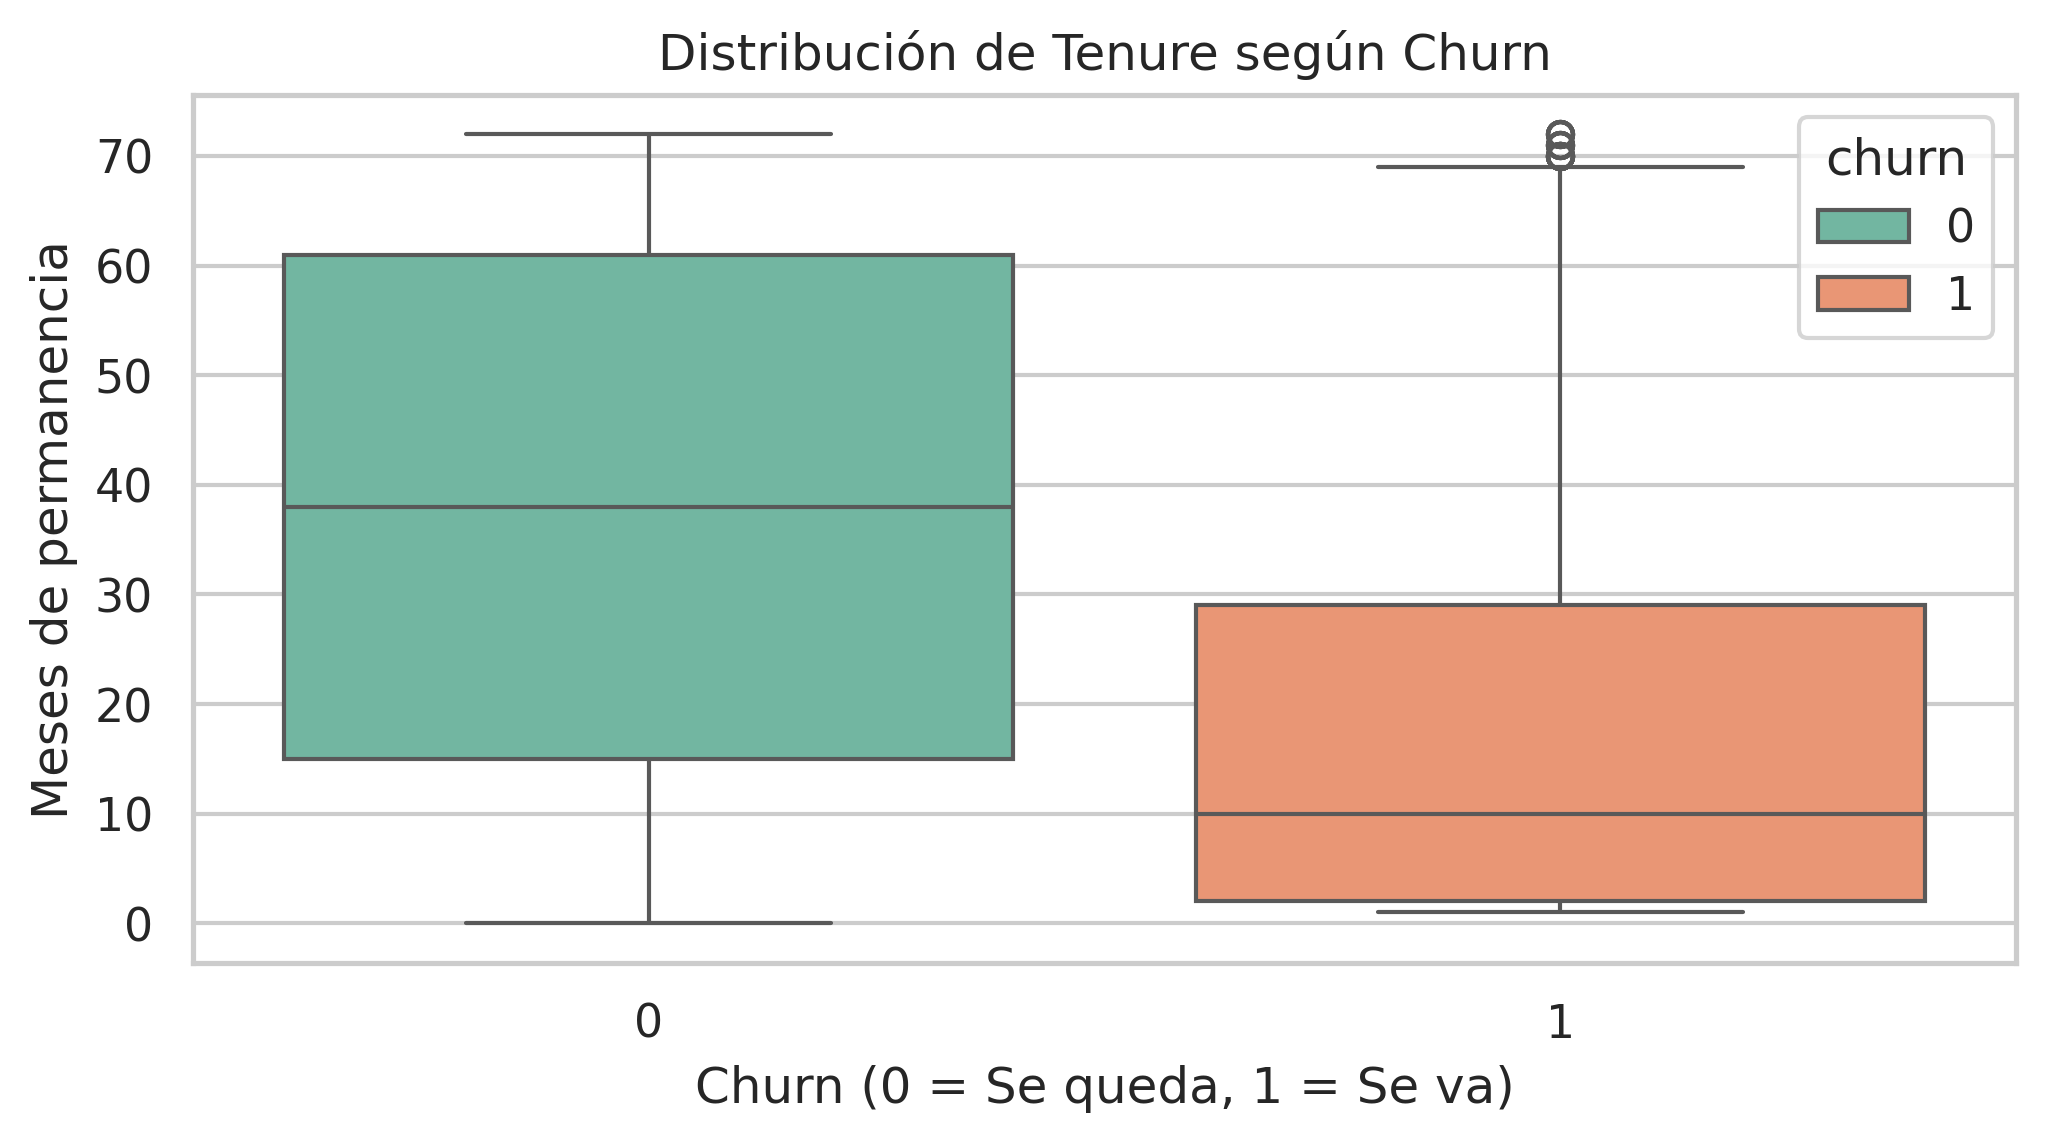


*   Se observó que ciertos métodos de pago, como electronic check, tienen una mayor proporción de evasión.


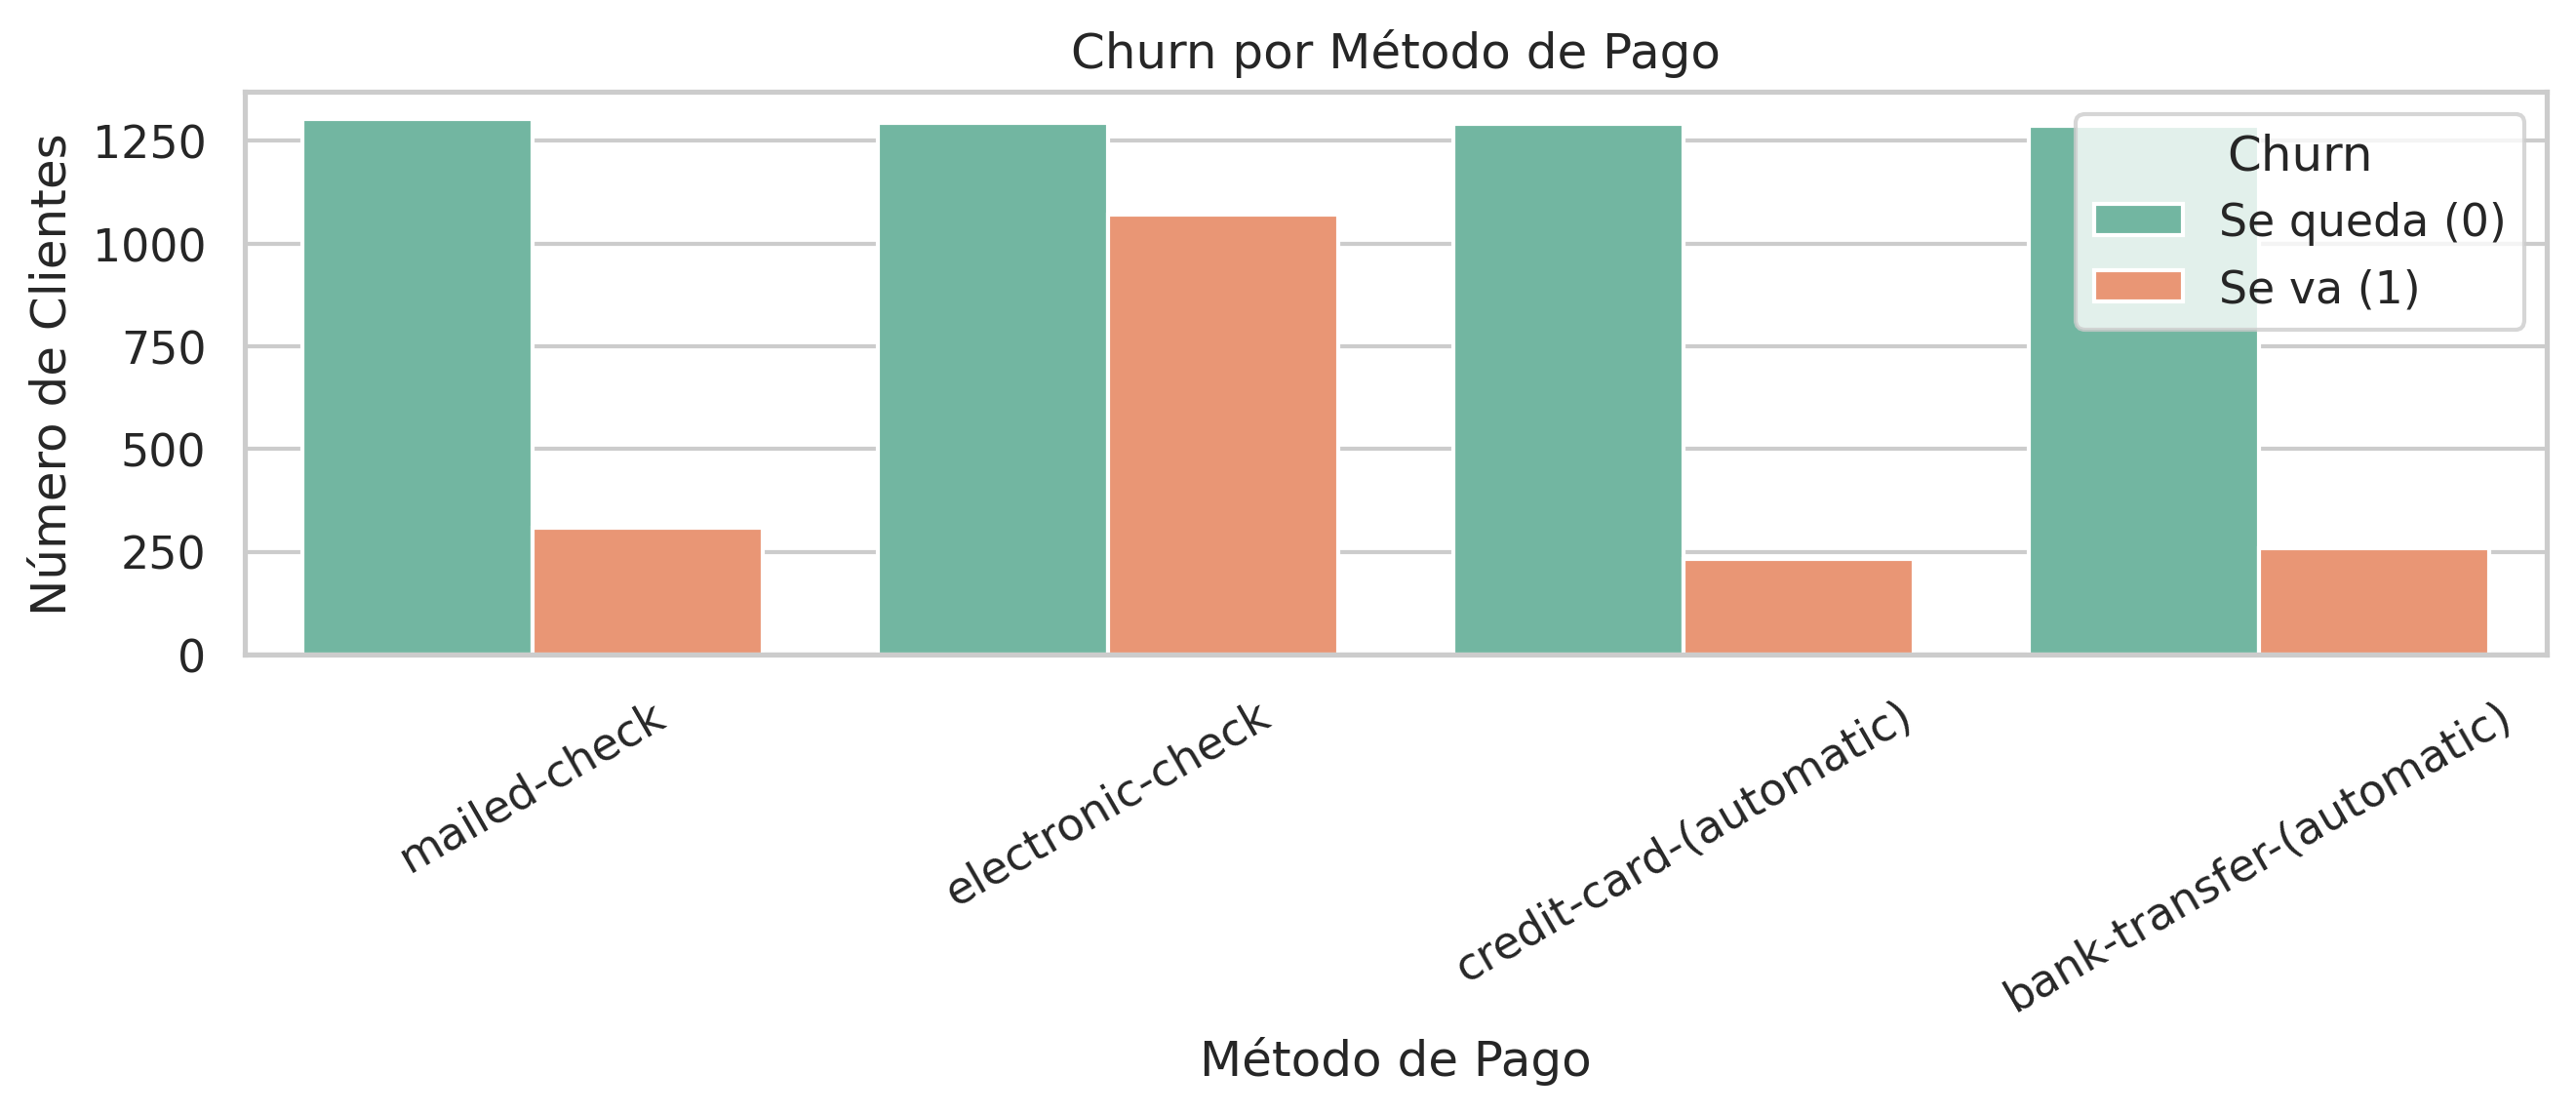

*   Los clientes con cargos mensuales altos y poca permanencia mostraron mayor tendencia a cancelar.

In [43]:
df_transformed.groupby('churn')[['tenure', 'charges.monthly', 'charges.total']].mean()


,tenure,charges.monthly,charges.total
churn,,,
0,37.569965,61.265124,2555.344141
1,17.979133,74.441332,1531.796094


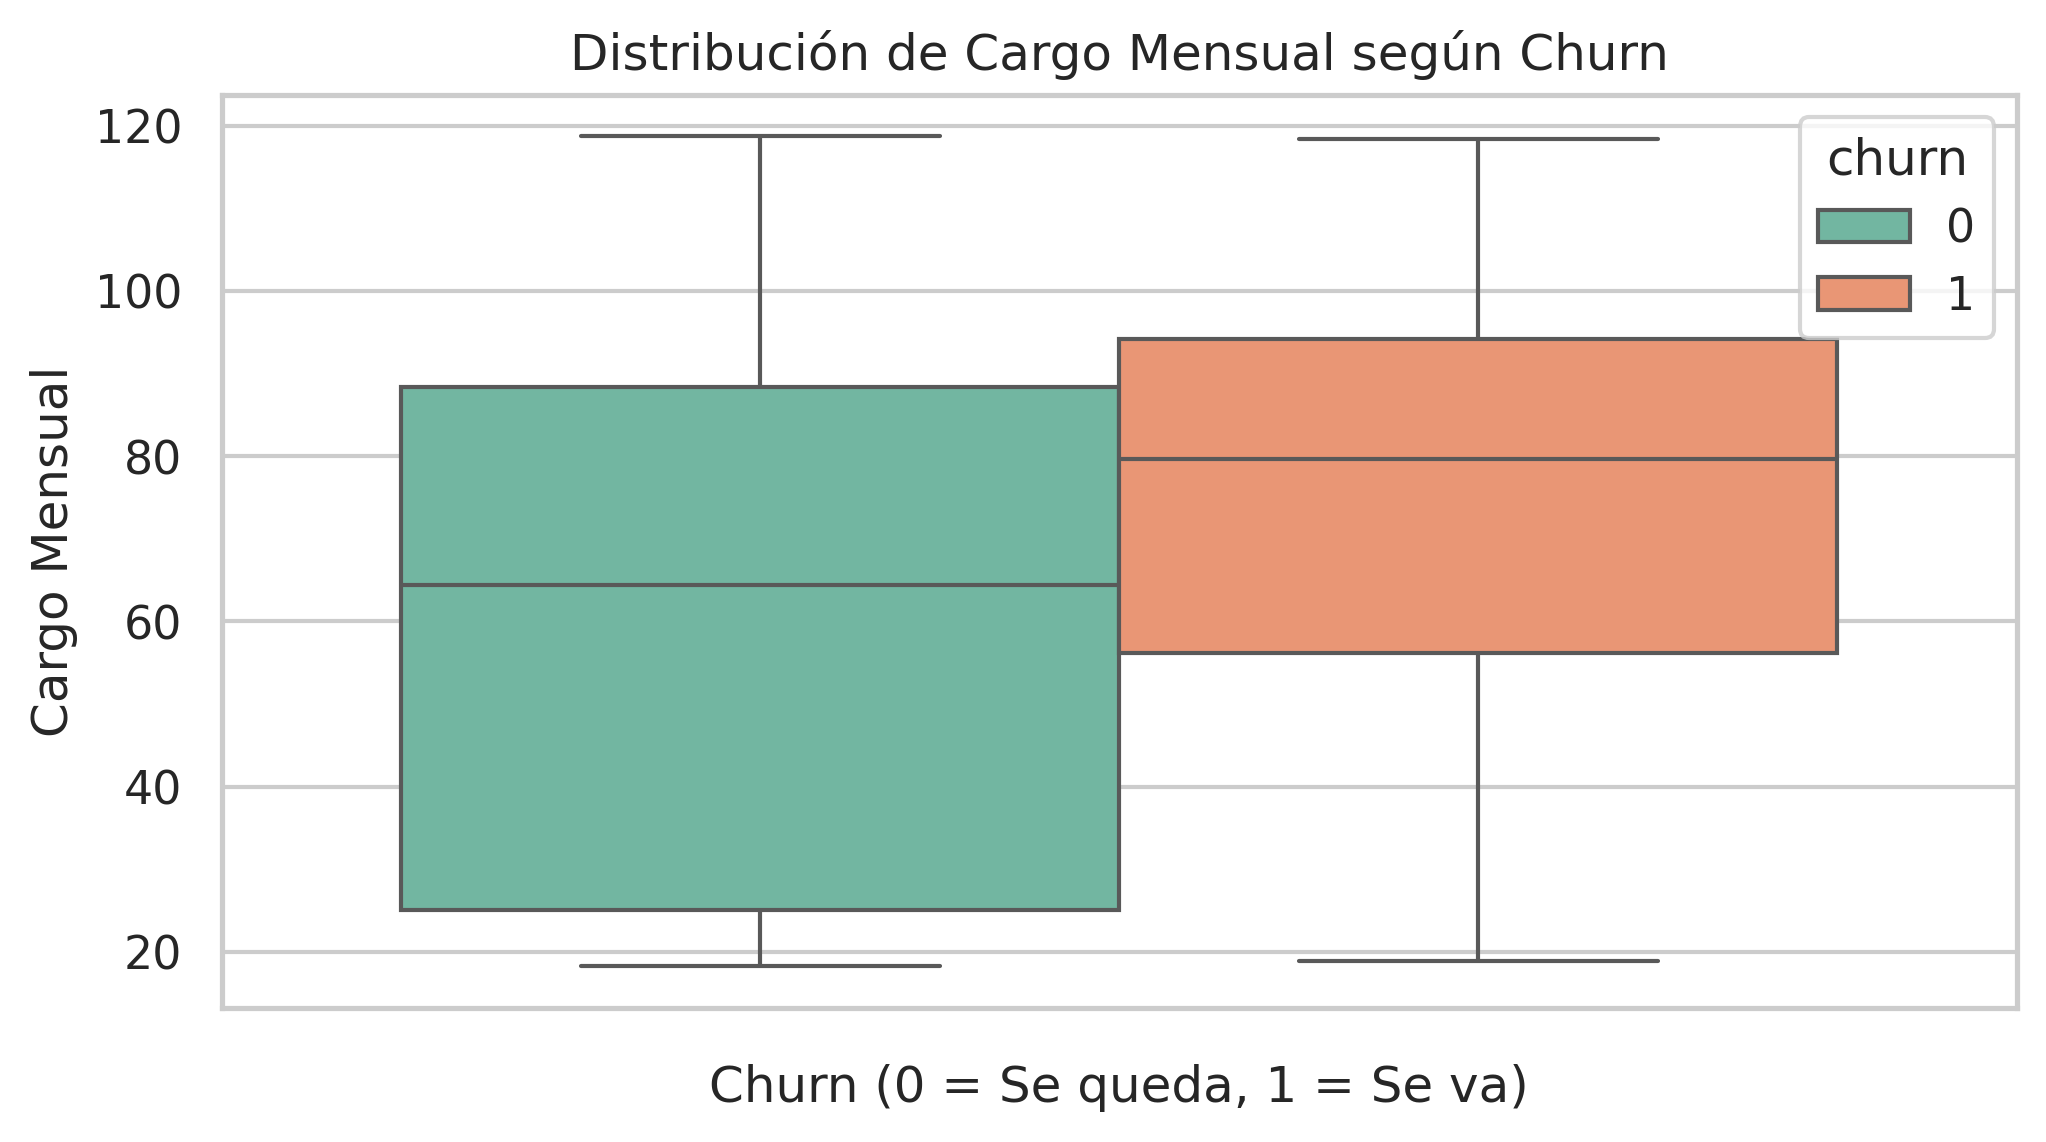

### Conclusiones e Insights



*   Los clientes con menos de 1 año de antigüedad y cargos altos son los que más se van.
*Los planes sin contrato (mes a mes) tienen tasas de evasión mucho más altas.
*Algunos métodos de pago pueden influir en la permanencia del cliente.
*Clientes que gastan menos por mes y han estado más tiempo tienden a quedarse.




### Recomendaciones


*   Ofrecer beneficios especiales a los clientes nuevos, especialmente en los primeros 6 meses.
*   Promover los contratos anuales o de 2 años con descuentos o regalos.
*   Revisar los planes con cargos mensuales más altos, ya que están más asociados a la evasión.
*Identificar y contactar clientes en riesgo (ej. llevan poco tiempo y pagan
mucho), con ofertas personalizadas o mejoras en el servicio.



# **-------------- Challenge 2 --------------**

## Preparacion de los datos

In [45]:
df_transformed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

In [46]:
df_transformed.drop(columns=['customerid'], inplace=True)

In [47]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 
 17  

In [52]:
df_transformed[['charges.monthly','charges.total']].corr()

,charges.monthly,charges.total
charges.monthly,1.000000,0.651065
charges.total,0.651065,1.000000


In [53]:
df_transformed[['cuentas_diarias','charges.total']].corr()

,cuentas_diarias,charges.total
cuentas_diarias,1.000000,0.651065
charges.total,0.651065,1.000000


In [54]:
df_transformed[['tenure', 'charges.monthly', 'charges.total']].corr()

,tenure,charges.monthly,charges.total
tenure,1.00000,0.247900,0.825880
charges.monthly,0.24790,1.000000,0.651065
charges.total,0.82588,0.651065,1.000000


In [56]:
df_encoded = pd.get_dummies(df_transformed, drop_first=True)
print(df_encoded.shape)


(7043, 32)


In [57]:
print(df_encoded.head())

   churn  seniorcitizen  tenure  charges.monthly  charges.total  \
0      0              0       9             65.6         593.30   
1      0              0       9             59.9         542.40   
2      1              0       4             73.9         280.85   
3      1              1      13             98.0        1237.85   
4      1              1       3             83.9         267.40   

   cuentas_diarias  gender_Male  partner_Yes  dependents_Yes  \
0         2.186667        False         True            True   
1         1.996667         True        False           False   
2         2.463333         True        False           False   
3         3.266667         True         True           False   
4         2.796667        False         True           False   

   phoneservice_Yes  ...  streamingtv_No internet service  streamingtv_Yes  \
0              True  ...                            False             True   
1              True  ...                            Fals

In [58]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [59]:
df_encoded[bool_cols].head()

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_one-year,contract_two-year,paperlessbilling_Yes,paymentmethod_credit-card-(automatic),paymentmethod_electronic-check,paymentmethod_mailed-check
0,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [60]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   churn                                  7043 non-null   int64  
 1   seniorcitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   charges.monthly                        7043 non-null   float64
 4   charges.total                          7032 non-null   float64
 5   cuentas_diarias                        7043 non-null   float64
 6   gender_Male                            7043 non-null   int64  
 7   partner_Yes                            7043 non-null   int64  
 8   dependents_Yes                         7043 non-null   int64  
 9   phoneservice_Yes                       7043 non-null   int64  
 10  multiplelines_No phone service         7043 non-null   int64  
 11  multiplel

In [62]:
churn_counts = df_encoded['churn'].value_counts()
churn_counts

,count
churn,
0,5174
1,1869


In [64]:
churn_proportion = df_encoded['churn'].value_counts(normalize=True)
churn_proportion

,proportion
churn,
0,0.73463
1,0.26537


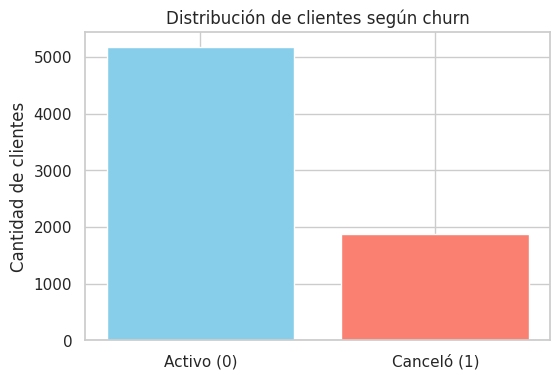

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue','salmon'])
plt.xticks([0,1], ['Activo (0)', 'Canceló (1)'])
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes según churn')
plt.show()

tenure             0
charges.monthly    0
charges.total      0
cuentas_diarias    0
dtype: int64


/tmp/ipython-input-3914277844.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


In [85]:
from sklearn.model_selection import train_test_split

In [87]:
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

In [88]:
num_cols = ['tenure', 'charges.monthly', 'charges.total', 'cuentas_diarias']
for col in num_cols:
    X[col].fillna(X[col].median(), inplace=True)

print("Valores faltantes después de imputación:")
print(X[num_cols].isnull().sum())

Valores faltantes después de imputación:
tenure             0
charges.monthly    0
charges.total      0
cuentas_diarias    0
dtype: int64


/tmp/ipython-input-729424305.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [81]:
from imblearn.over_sampling import SMOTE

In [90]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [91]:
print("Distribución original en train:")
print(y_train.value_counts(normalize=True))
print("\nDistribución después de SMOTE:")
print(y_train_res.value_counts(normalize=True))

Distribución original en train:
churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Distribución después de SMOTE:
churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [92]:
from sklearn.preprocessing import StandardScaler

In [94]:
num_cols = ['tenure', 'charges.monthly', 'charges.total', 'cuentas_diarias']

In [95]:
scaler = StandardScaler()

In [97]:
X_train_res[num_cols] = scaler.fit_transform(X_train_res[num_cols])

In [98]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [101]:
print(X_train_res.head())


   seniorcitizen    tenure  charges.monthly  charges.total  cuentas_diarias  \
0              0  1.358907         0.919458       1.578919         0.919458   
1              0 -0.642225        -1.701551      -0.834449        -1.701551   
2              0 -1.059128         0.440839      -0.868929         0.440839   
3              0  0.233270         0.240976       0.193053         0.240976   
4              0 -0.558845         0.635442      -0.398070         0.635442   

   gender_Male  partner_Yes  dependents_Yes  phoneservice_Yes  \
0            0            1               0                 1   
1            1            0               1                 1   
2            0            0               0                 1   
3            1            1               1                 1   
4            0            0               1                 1   

   multiplelines_No phone service  ...  streamingtv_No internet service  \
0                               0  ...                     

In [102]:
print(X_test.head())

      seniorcitizen  tenure  charges.monthly  charges.total  cuentas_diarias  \
470               0    21.0            28.50         629.35         0.950000   
2359              1    11.0           111.40        1183.05         3.713333   
2313              1     4.0            69.35         261.65         2.311667   
4658              0     5.0            19.95         107.05         0.665000   
3921              0    72.0            65.65        4664.50         2.188333   

      gender_Male  partner_Yes  dependents_Yes  phoneservice_Yes  \
470             0            1               0                 0   
2359            1            0               0                 1   
2313            1            0               0                 1   
4658            1            0               0                 1   
3921            1            1               1                 0   

      multiplelines_No phone service  ...  streamingtv_No internet service  \
470                             

## Correlación y selección de variables

### Analisis de correlación

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df_corr = X_train_res.copy()
df_corr['churn'] = y_train_res

In [105]:
corr_matrix = df_corr.corr()

In [107]:
corr_churn = corr_matrix['churn'].sort_values(ascending=False)
print("Correlación de las variables con churn:")
print(corr_churn)

Correlación de las variables con churn:
churn                                    1.000000
internetservice_Fiber optic              0.312677
cuentas_diarias                          0.219242
charges.monthly                          0.219242
paymentmethod_electronic-check           0.212028
paperlessbilling_Yes                     0.125109
seniorcitizen                            0.034540
phoneservice_Yes                        -0.028096
streamingtv_Yes                         -0.035383
multiplelines_Yes                       -0.050415
streamingmovies_Yes                     -0.054197
multiplelines_No phone service          -0.057976
gender_Male                             -0.159667
paymentmethod_mailed-check              -0.180619
deviceprotection_Yes                    -0.198730
onlinebackup_Yes                        -0.218011
charges.total                           -0.246504
paymentmethod_credit-card-(automatic)   -0.262714
contract_one-year                       -0.295442
deviceprot

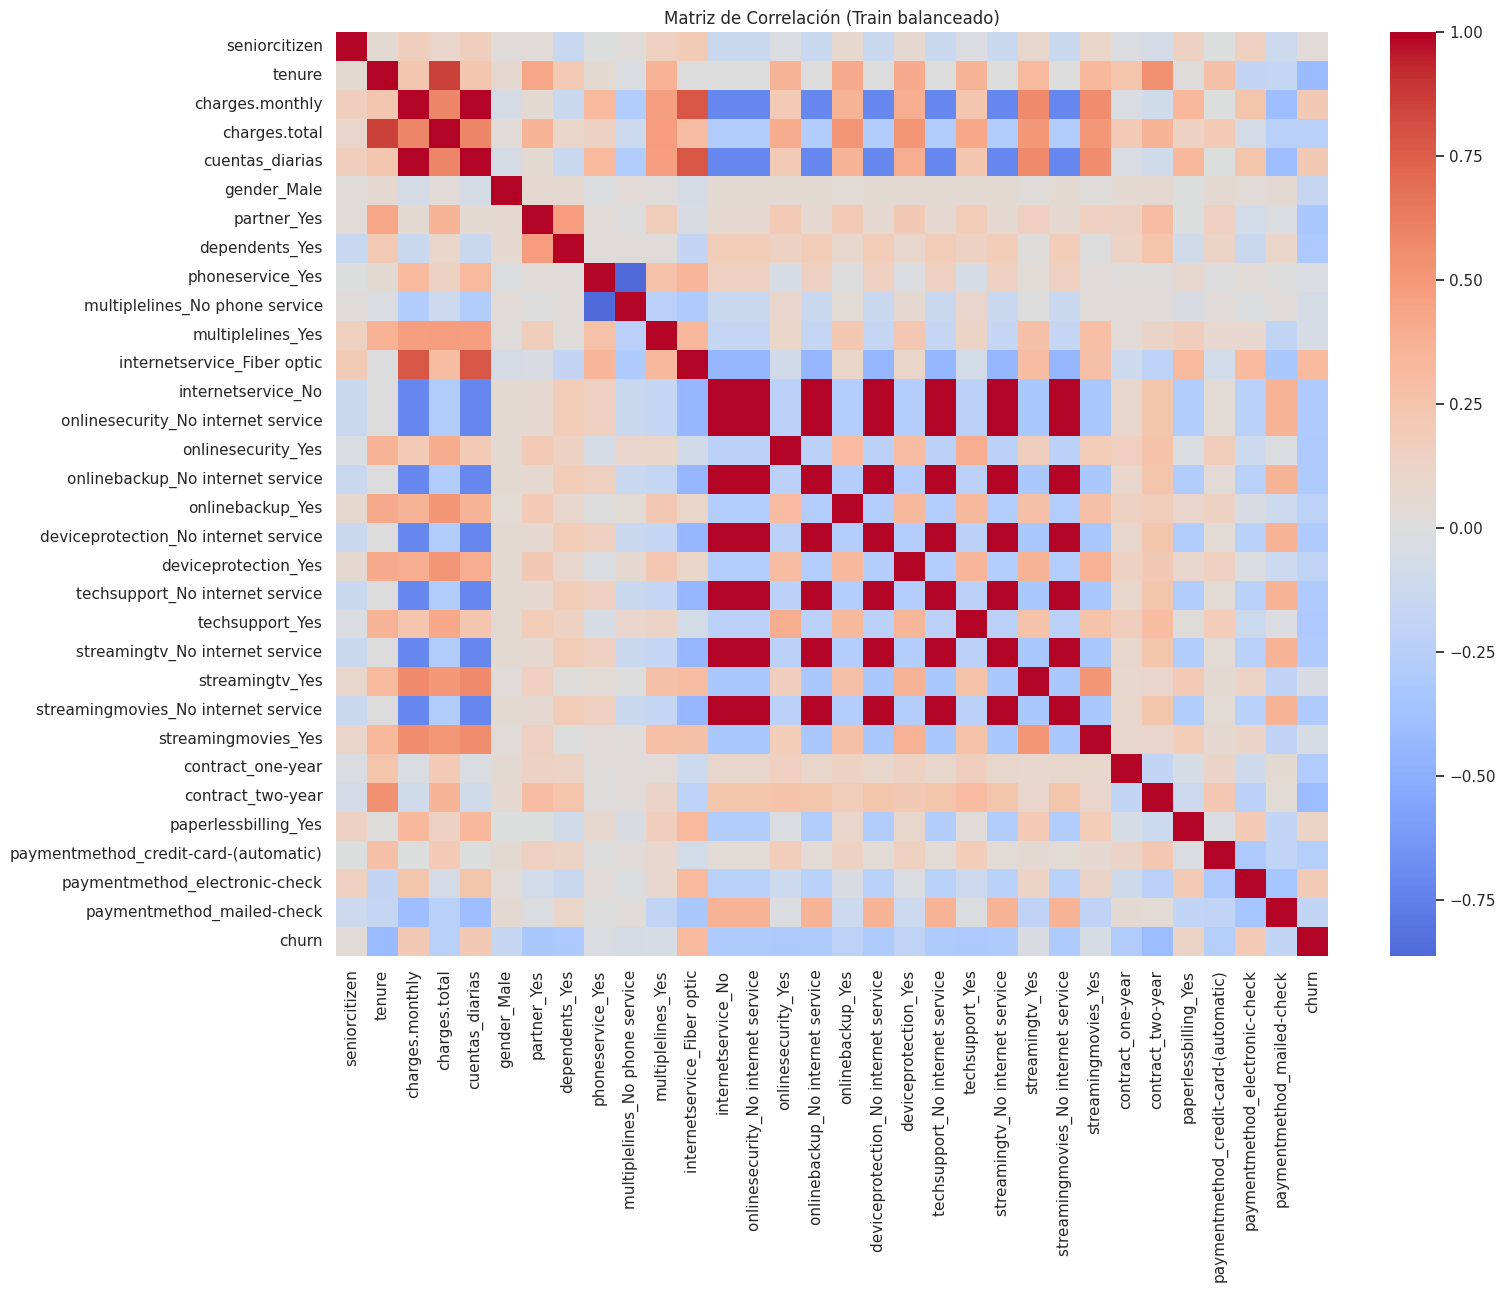

In [108]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación (Train balanceado)")
plt.show()


In [109]:
#Variables como tenure, contract_two-year, partner_Yes y techsupport_Yes son fuertes predictores de retención.

#Variables como internetservice_Fiber optic, charges.monthly y paymentmethod_electronic-check son fuertes predictores de cancelación.

### Analisis dirigido

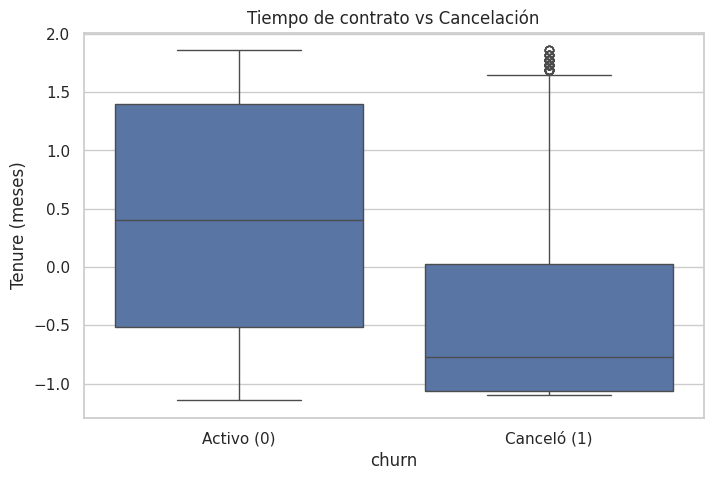

In [110]:
plt.figure(figsize=(8,5))
sns.boxplot(x=y_train_res, y=X_train_res['tenure'])
plt.xticks([0,1], ['Activo (0)', 'Canceló (1)'])
plt.ylabel('Tenure (meses)')
plt.title('Tiempo de contrato vs Cancelación')
plt.show()

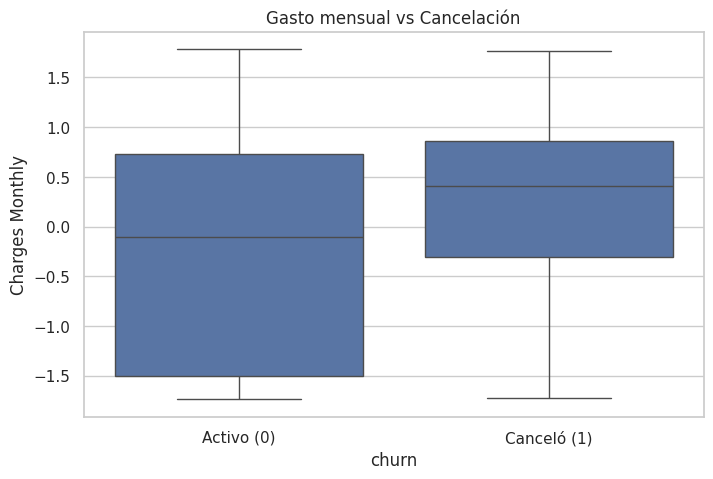

In [112]:
plt.figure(figsize=(8,5))
sns.boxplot(x=y_train_res, y=X_train_res['charges.monthly'])
plt.xticks([0,1], ['Activo (0)', 'Canceló (1)'])
plt.ylabel('Charges Monthly')
plt.title('Gasto mensual vs Cancelación')
plt.show()

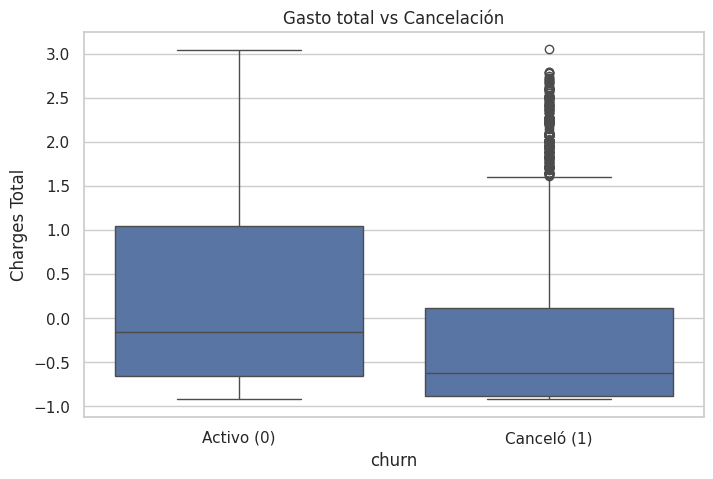

In [113]:
plt.figure(figsize=(8,5))
sns.boxplot(x=y_train_res, y=X_train_res['charges.total'])
plt.xticks([0,1], ['Activo (0)', 'Canceló (1)'])
plt.ylabel('Charges Total')
plt.title('Gasto total vs Cancelación')
plt.show()

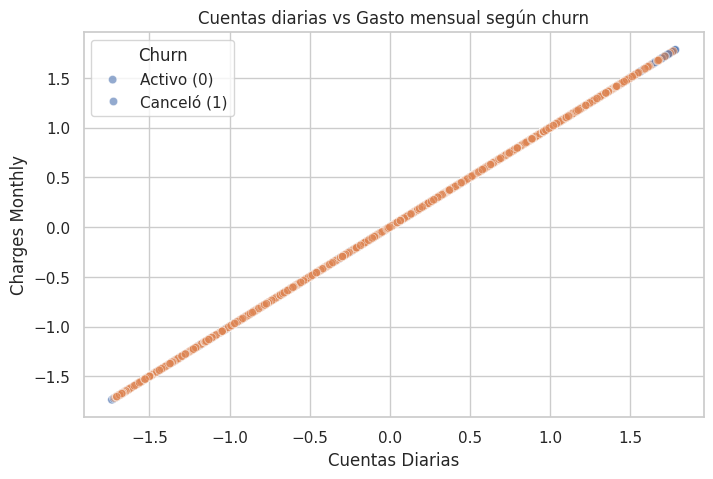

In [114]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train_res['cuentas_diarias'],
                y=X_train_res['charges.monthly'],
                hue=y_train_res, alpha=0.6)
plt.xlabel('Cuentas Diarias')
plt.ylabel('Charges Monthly')
plt.title('Cuentas diarias vs Gasto mensual según churn')
plt.legend(title='Churn', labels=['Activo (0)', 'Canceló (1)'])
plt.show()

## Modelado Predictivo

### Separacion de datos

In [116]:
#El conjunto de datos ya está trabajado y la division fue de 80% para entrenamientto y 20% para prueba
print("Train:", X_train_res.shape, y_train_res.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (8278, 31) (8278,)
Test: (1409, 31) (1409,)


### Creación de Modelos

#### Regresion logistica (normalizacion)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [118]:
logreg= LogisticRegression(max_iter=1000,random_state=42)

In [119]:
logreg.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [121]:
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1]

In [122]:
print("=== Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob_logreg))

=== Regresión Logística ===
[[   0 1035]
 [   0  374]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1035
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409

ROC-AUC: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [123]:
logreg_balanced = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

logreg_balanced.fit(X_train_res, y_train_res)

y_pred_logreg_bal = logreg_balanced.predict(X_test)
y_pred_prob_logreg_bal = logreg_balanced.predict_proba(X_test)[:,1]

In [124]:
print("=== Regresión Logística Balanceada ===")
print(confusion_matrix(y_test, y_pred_logreg_bal))
print(classification_report(y_test, y_pred_logreg_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob_logreg_bal))

=== Regresión Logística Balanceada ===
[[   0 1035]
 [   0  374]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1035
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409

ROC-AUC: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Random Forest (sin normalización)

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

In [133]:
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

In [134]:
print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob_rf))

=== Random Forest ===
[[755 280]
 [ 96 278]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1035
           1       0.50      0.74      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.78      0.73      0.75      1409

ROC-AUC: 0.8041954067529515


### Evaluacion de los modelos

Regresión Logística


```
    Accuracy: 0.27 → muy baja.

    F1-score (churn): 0.42 → detecta churn, pero falla en activos.

    F1-score (activo): 0 → no predice activos correctamente.

    ROC-AUC: 0.50 → no discrimina entre clases.

    Matriz de confusión: [[0, 1035], [0, 374]] → predice solo la clase minoritaria.
```


    

Random Forest (max_depth=10)

    Accuracy: 0.73 → buen desempeño global.

    F1-score (churn): 0.60 → predice churn de manera razonable.

    F1-score (activo): 0.80 → predice la clase mayoritaria muy bien.

    ROC-AUC: 0.804 → excelente discriminación entre clases.

    Matriz de confusión: [[755, 280], [96, 278]] → predice ambas clases con buen balance.

Comparacion critica


```
Regresión Logística: Modelo lineal simple. No captura la
clase mayoritaria en test desbalanceado. Underfitting evidente.

Random Forest: Modelo no lineal robusto.
Buen equilibrio entre clases. Ligeramente más generalizable tras limitar max_depth.
```



Análisis de overfitting / underfitting



```
Regresión Logística

    Underfitting: no logra capturar la distribución real de churn vs activos.

    Causa: modelo lineal simple y test desbalanceado.

    Posible ajuste: usar modelos no lineales, incluir interacciones, regularización.

Random Forest (max_depth=10)

    Leve overfitting en train posible, pero test muestra buen desempeño:

        Accuracy y ROC-AUC altas → buena generalización.

    Ajustes adicionales: tuning de n_estimators, min_samples_leaf, o usar cross-validation para optimizar hiperparámetros.
```



Conclusión de desempeño

```
Random Forest es claramente el mejor modelo para predecir la cancelación.

Captura tanto la clase mayoritaria como la minoritaria, maneja variables numéricas y binarias, y no requiere normalización.

Regresión Logística no es adecuada en este escenario desbalanceado y con relaciones no lineales.
```



## Interpretación y Conclusiones

Top 10 variables más importantes:
              Variable  Importancia
1               tenure     0.121775
26   contract_two-year     0.104347
3        charges.total     0.089450
20     techsupport_Yes     0.075814
14  onlinesecurity_Yes     0.063872
25   contract_one-year     0.062594
4      cuentas_diarias     0.058194
2      charges.monthly     0.057220
6          partner_Yes     0.043362
7       dependents_Yes     0.033078


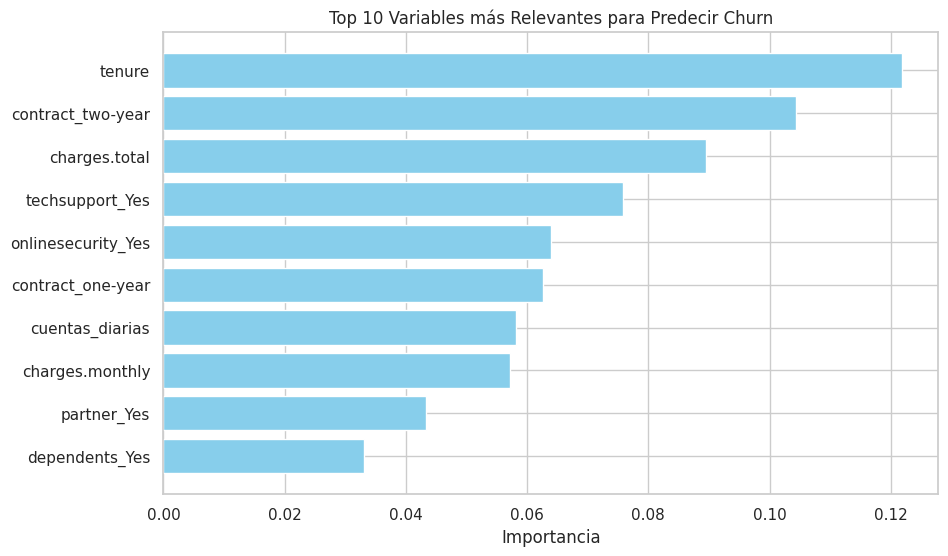

In [137]:
importances = rf.feature_importances_
features = X_train_res.columns


importance_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)


print("Top 10 variables más importantes:")
print(importance_df.head(10))


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importance_df['Variable'].head(10)[::-1], importance_df['Importancia'].head(10)[::-1], color='skyblue')
plt.xlabel("Importancia")
plt.title("Top 10 Variables más Relevantes para Predecir Churn")
plt.show()


### Conclusión del Análisis de Cancelación de Clientes – Telecom X


**Resumen del proyecto**:

El objetivo de este proyecto fue desarrollar modelos predictivos para anticipar qué clientes tienen mayor probabilidad de cancelar sus servicios (churn), utilizando un conjunto de datos de 7.043 clientes con información demográfica, de uso de servicios y de facturación.

Se aplicó un pipeline completo de preprocesamiento, análisis exploratorio, balanceo de clases, creación de modelos y evaluación.





**Evaluación de los modelos**:


Regresión Logística.
```
    Accuracy: 0.27 → muy baja.

    F1-score (churn): 0.42 → detecta churn, pero falla en activos.

    F1-score (activo): 0 → no predice activos correctamente.

    ROC-AUC: 0.50 → no discrimina entre clases.

    Matriz de confusión: [[0, 1035], [0, 374]] → predice solo la clase minoritaria.
```
Random Forest (max_depth=10).
```
 Accuracy: 0.73 → buen desempeño global.

    F1-score (churn): 0.60 → predice churn de manera razonable.

    F1-score (activo): 0.80 → predice la clase mayoritaria muy bien.

    ROC-AUC: 0.804 → excelente discriminación entre clases.

    Matriz de confusión: [[755, 280], [96, 278]] → predice ambas clases con buen balance.
```

El Random Forest es claramente el modelo más adecuado para predecir la cancelación.

La Regresión Logística no logra discriminar entre clientes que cancelan y los que permanecen activos debido al desbalance de clases y a relaciones no lineales en los datos.


**Factores más influyentes en la cancelación**:

Basado en Random Forest, los 10 factores principales son




1.   tenure (meses de contrato): Clientes recientes tienen mayor probabilidad de cancelar.
2.   contract_two-year (contrato a dos años): Contratos largos reducen la cancelación.
3.   charges.total (gasto total acumulado): Clientes con menor gasto total tienden a cancelar más.
4.   techsupport_Yes (servicio de soporte técnico): Reduce la probabilidad de churn.
5.   onlinesecurity_Yes (servicio de seguridad en línea): Ayuda a retener clientes.
6.  contract_one-year (contrato a un año): Contratos anuales también contribuyen a la retención.
7. cuentas_diarias (uso promedio diario): Mayor actividad indica fidelidad.
8. charges.monthly (gasto mensual de todos los servicios): Mayor gasto mensual se asocia a menor cancelación.
9. partner_Yes (cliente con pareja): Indica mayor estabilidad personal y menor churn.
10. dependents_Yes (cliente con dependientes): Similar al anterior; mayor estabilidad familiar reduce cancelación.









**Insights estratégicos**:



*   Tiempo y tipo de contrato: Promover contratos más largos y programas de fidelización para clientes nuevos.
*   Servicios de valor agregado: Tech Support y Online Security ayudan a retener clientes; considerar paquetes promocionales.
*   Clientes de bajo gasto: Identificar clientes con menor gasto acumulado o mensual y ofrecer incentivos para reducir churn.
*   Factores personales: Programas de retención personalizados considerando estabilidad familiar o estado civil pueden ser útiles.




